In [902]:
#Libraries
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns


In [903]:
#Parameters

totalTime=5000;
dt=2;
nsteps=int(floor(totalTime/dt));
num_cicles=10;

    
N=512;
origin = pi

#temporal variable (largerT --> smaller firing rate)
tauE=  60  #6; 
tauI=  100 #10; 
tauf =60
taud =2



#Conductances (larger G means larger firing rate). Diff cond. for connections
GEE=  0.68
GEI=  0.05 #0.03 
GIE=  0.03
GII=  0.02
I0E=  0.7##0.2; (as it decreases --> less bumps)
I0I=  0.002##0.5; (as it increases --> less bumps)
U =0.4

#Realted with noise
sigE=  0.06 #1.5 #1 #0.5 ;
sigI=  0.04 #1.6 #2 #1.3 ;

#Stimulus (when on and off, separation between them and strenght)
targ_onset = 100;
targ_offset = 300;
dist_onset = 2000 #2000 #600;
dist_offset = 2200 #2100 #800;

n_stims=2; #2
stim_sep = pi/4 ###13 --> 2   (13 attract, 9 solo 1, 5 repulsion, 2 nada)
#stim_sep=0



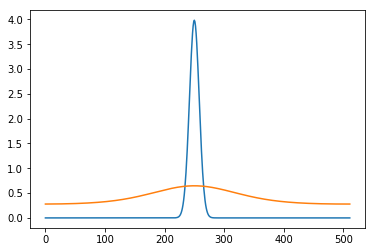

In [904]:
#Connectivities

kappa_E=  100  # 100  1/k in vaon misses is std    ( https://en.wikipedia.org/wiki/Von_Mises_distribution) 
kappa_I= 1.3 ###2.9 

v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));


theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)] 

for i in range(0, N):
    v_E_new=[e**(kappa_E*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_E)) for f in range(0, len(theta))]    
    v_I_new=[e**(kappa_I*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_I)) +0.25 for f in range(0, len(theta))] #0.18
    ###    
    vE_NEW=roll(v_E_new,i)
    vI_NEW=roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=vE_NEW
    WI[:,i]=vI_NEW

    
    
    
plt.plot(WE[250, :])
plt.plot(WI[250, :])
plt.show(block=False)


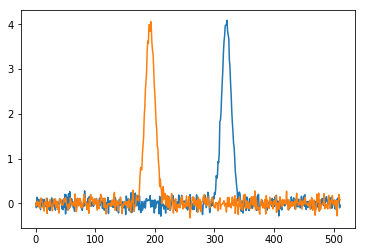

In [905]:
# stims

kappa_stim= 100

target=zeros((N))
distractor=zeros((N))

for i in range(0, N):
    target[i]=e**(kappa_stim*cos(theta[i] + origin - stim_sep)) / (2*pi*scipy.special.i0(kappa_stim)) 
    distractor[i]=e**(kappa_stim*cos(theta[i] + origin + stim_sep)) / (2*pi*scipy.special.i0(kappa_stim)) 


target = target+ np.random.normal(0, 0.1, N)
target=reshape(target, (N,1)) 


distractor = distractor+ np.random.normal(0, 0.1, N)
distractor=reshape(distractor, (N,1)) 

    
######################

targon = floor(targ_onset/dt);
targoff = floor(targ_offset/dt);

diston = floor(dist_onset/dt);
distoff = floor(dist_offset/dt);

plt.plot(target)
plt.plot(distractor)
plt.show(block=False)

In [906]:
#Simulation

rE=zeros((N,1));
rI=zeros((N,1)); 
u = np.ones((N,1))*U
x = np.zeros((N,1))

#generation of the noise and the connectivity between inhib and exit
RE=zeros((N,nsteps));
RI=zeros((N,nsteps));
p_u=np.ones((N,nsteps));
p_x=np.ones((N,nsteps));

f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)


### diferential equations
for i in range(0, nsteps):
    noiseE = sigE*random.randn(N,1);
    noiseI = sigI*random.randn(N,1);
    
    #differential equations for connectivity
    IE= GEE*dot(WE, (rE * u * x)) - GIE*dot(WI,rI) + I0E*ones((N,1)); 
    II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));
    
    if i>targon and i<targoff:
        IE=IE+target;
        II=II+target;
    
    if i>diston and i<distoff:
        IE=IE+distractor;
        II=II+distractor;
    
    
    #rates of exit and inhib   
    rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
    rI = rI + (f(II) - rI + noiseI)*dt/tauI;
    re_norm = (rE-min(rE))/(   max(rE) - min(rE));
    u= (U - u) / tauf + U*(1-u)*re_norm;
    x = (1 - x)/taud - u*(1-x)*re_norm;
    
    
    
    #
    #####facilitation = facilitation + ( - (facilitation-1) + k_Ca * rE ) *dt/tauCa 
    
    rEr=reshape(rE, N)
    rIr=reshape(rI, N)
    ur=reshape(u, N)
    xr=reshape(x, N)
    #drawnow
    RE[:,i] = rEr;
    RI[:,i] = rIr;
    p_u[:,i] = ur;
    p_x[:,i] = xr;
    






In [907]:
np.arange(0, 1, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

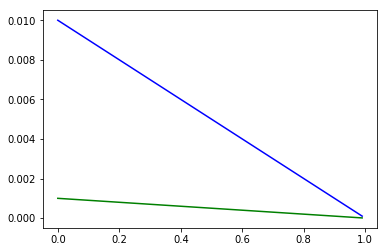

In [908]:



r = [(1 - x)/100 for x in np.arange(0, 1, 0.01)]
r2 = [(1 - x)/1000 for x in np.arange(0, 1, 0.01)]

plt.plot(np.arange(0, 1, 0.01), r, 'b')
plt.plot(np.arange(0, 1, 0.01), r2, 'g')

In [909]:
# rE = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

# U =0.4
# u=U
# x=0

# us = []
# xs=[]
# for r in rE:
#     u= (U - u) / 60 + U*(1-u)*r;
#     x = (1-x)/2- u*x*r;
#     us.append(u)
#     xs.append(x)

    
# ###    
# plt.plot(np.array(us), 'b')
# plt.plot(np.array(xs), 'r')

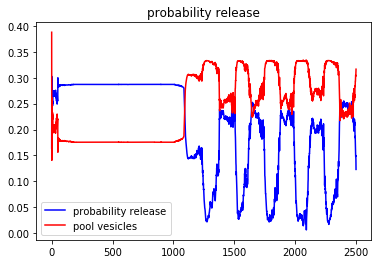

In [910]:
p_targ = int((N * np.degrees(origin + stim_sep))/360)
p_dist= int((N * np.degrees(origin - stim_sep))/360)

plt.title('probability release')
plt.plot(p_u[p_targ, :], 'b', label='probability release')
plt.plot(p_x[p_targ, :], 'r', label='pool vesicles')
plt.legend()


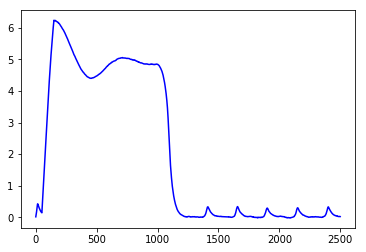

In [911]:
plt.plot(RE[p_targ, :], 'b', label='target')

In [912]:
# import sympy
# from sympy import DiracDelta
# #sympy.functions.special.delta_functions.DiracDelta
# r_x = [rE[i][0] for i in range(len(rE))]
# r_dirac = [DiracDelta(r_x[n]) for n in range(len(rE))]
# plt.plot(r_dirac)

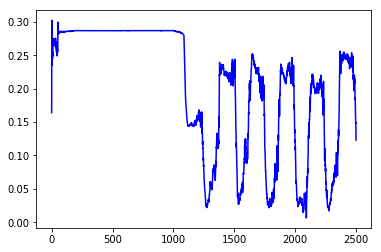

In [913]:
plt.plot(p_u[p_targ, :], 'b', label='probability release')


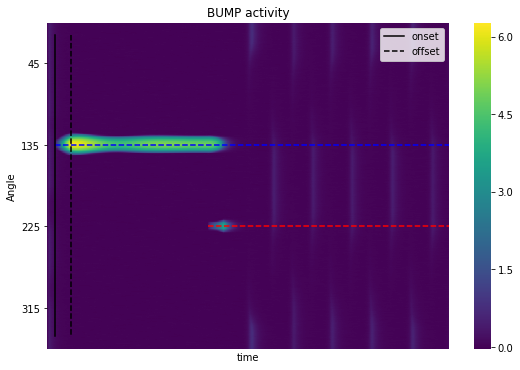

In [914]:
### Plot of activity
RE_sorted=flipud(RE)
plt.figure(figsize=(9,6))
sns.heatmap(RE_sorted, cmap='viridis')
plt.title('BUMP activity')
plt.ylabel('Angle')
plt.xlabel('time')
plt.plot([targon, nsteps], [p_dist, p_dist], '--b',) ## flipped, so it is p_target 
plt.plot([diston, nsteps], [p_targ, p_targ], '--r',) ## flipped, so it is p_target 
plt.yticks([])
plt.xticks([])

plt.yticks([N/8, 3*N/8, 5*N/8, 7*N/8 ] ,['45','135','225', '315'])

plt.plot([targ_onset/2, targ_onset/2,], [0+20, N-20], 'k-', label='onset')
plt.plot([targ_offset/2, targ_offset/2,], [0+20, N-20], 'k--', label='offset')

plt.legend()
plt.show(block=False)